In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [2]:
# Load and preprocess data
df = pd.read_csv(r"C:\Programowanie\codecademy_projects\data_sets_codecademy\honeyproduction.csv")

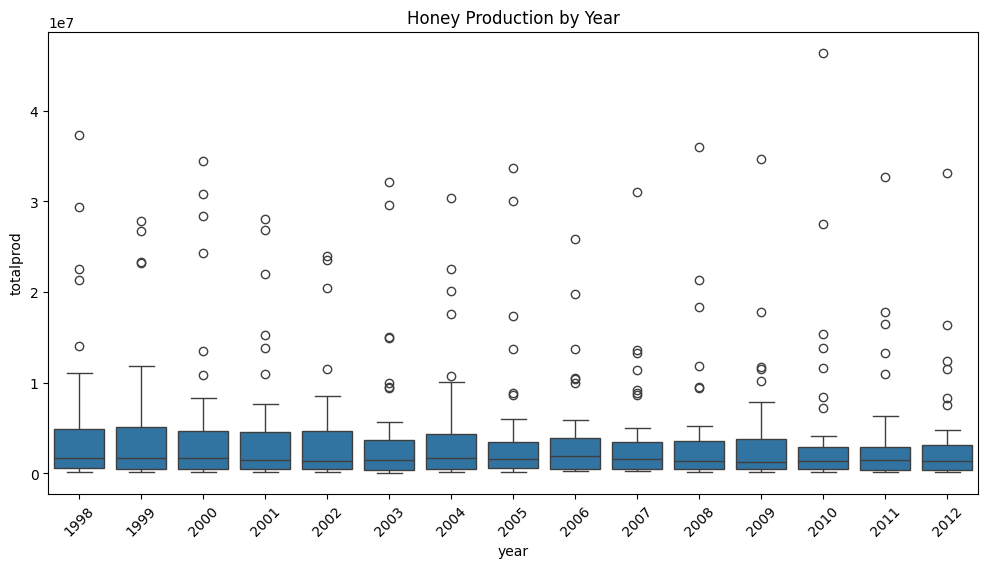

In [3]:
# Data Exploration
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='totalprod', data=df)
plt.title('Honey Production by Year')
plt.xticks(rotation=45)
plt.show()

In [4]:
# Feature Engineering
df['prod_change'] = df.groupby('state')['totalprod'].pct_change()

# Aggregating data
prod_per_year = df.groupby('year').agg({
    'totalprod': 'mean',
    'prod_change': 'mean'
}).reset_index()

In [5]:
# Prepare data for modeling
X = prod_per_year[['year']]
y = prod_per_year['totalprod']

In [6]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [9]:
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

LinearRegression()

In [10]:
# Predictions
y_pred_lr = lr.predict(X_test)
y_pred_pr = pr.predict(X_test_poly)

In [11]:
# Model Evaluation
print("Linear Regression R-squared:", r2_score(y_test, y_pred_lr))
print("Polynomial Regression R-squared:", r2_score(y_test, y_pred_pr))

Linear Regression R-squared: 0.695775287425722
Polynomial Regression R-squared: 0.8297184167652667


In [12]:
# Cross-validation
lr_scores = cross_val_score(lr, X, y, cv=5)
pr_scores = cross_val_score(pr, X_poly, y, cv=5)
print("Linear Regression CV scores:", lr_scores.mean())
print("Polynomial Regression CV scores:", pr_scores.mean())

Linear Regression CV scores: -5.797467479608468
Polynomial Regression CV scores: -5.69295568110537


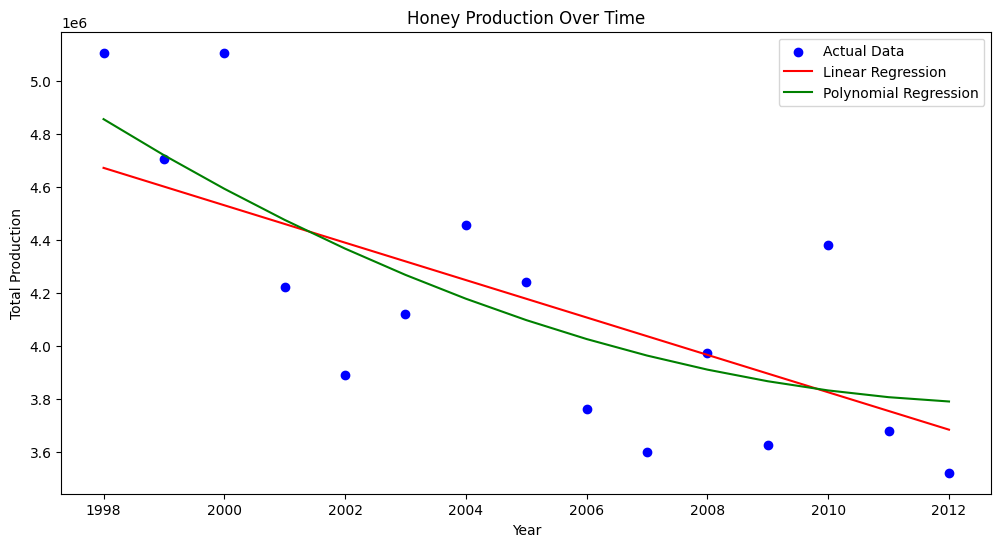

In [13]:
# Visualize results
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, lr.predict(X), color='red', label='Linear Regression')
plt.plot(X, pr.predict(X_poly), color='green', label='Polynomial Regression')
plt.title('Honey Production Over Time')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.legend()
plt.show()

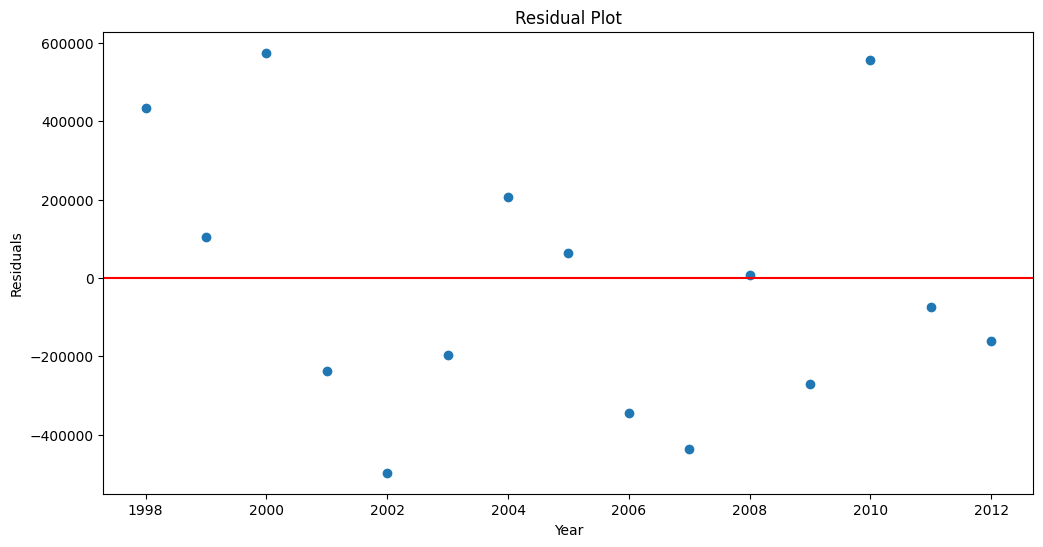

In [14]:
# Residual Analysis
residuals = y - lr.predict(X)
plt.figure(figsize=(12, 6))
plt.scatter(X, residuals)
plt.title('Residual Plot')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

In [15]:
# Time Series Analysis (example using statsmodels)
ts_model = sm.tsa.ARIMA(y, order=(1,1,1))
results = ts_model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:              totalprod   No. Observations:                   15
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -201.982
Date:                Wed, 26 Jun 2024   AIC                            409.963
Time:                        15:27:06   BIC                            411.881
Sample:                             0   HQIC                           409.786
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8760      0.072     12.181      0.000       0.735       1.017
ma.L1         -0.9999      0.361     -2.772      0.006      -1.707      -0.293
sigma2      1.362e+11   2.66e-12   5.13e+22      0.0

In [16]:
# Future predictions with confidence intervals
future_years = pd.DataFrame({'year': range(2013, 2051)})
forecast = results.get_forecast(steps=len(future_years))
pred_mean = forecast.predicted_mean
pred_ci = forecast.conf_int()

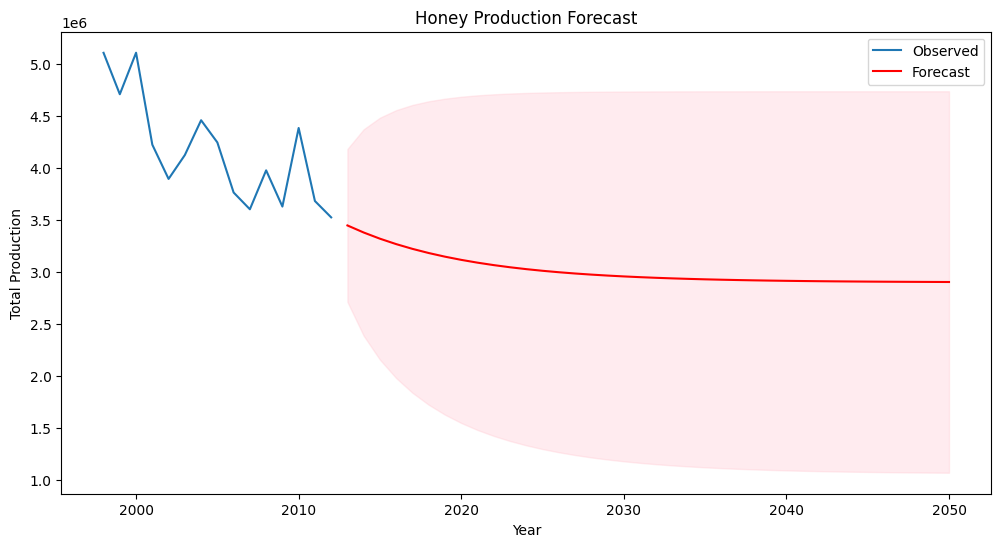

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(X, y, label='Observed')
plt.plot(future_years, pred_mean, color='red', label='Forecast')
plt.fill_between(future_years.year, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Honey Production Forecast')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.legend()
plt.show()